Induwara Senadheera </br> 190574U


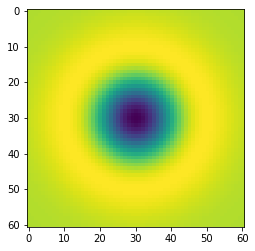

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

sigma=10
hw=3*sigma
X,Y=np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))
log=1/(2*np.pi*sigma**2)*(X**2/(sigma**2)+Y**2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))
plt.imshow(log)
X

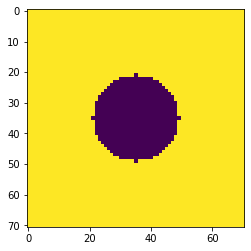

In [6]:
# Question 2

#Generating the cicle
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

w,h=71,71
hw=w//2
hh=h//2

f=np.ones((h,w),dtype=np.float32)*255
X,Y=np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))

r=w//5
f*=X**2+Y**2>r**2
plt.imshow(f)


(35, 35, 5)
10


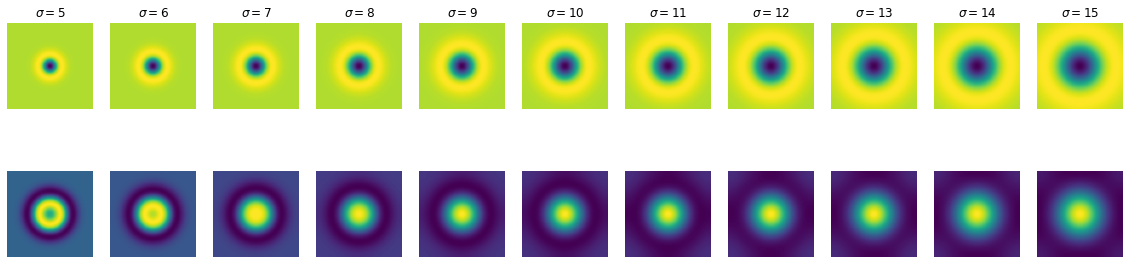

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
s=11
fig,ax=plt.subplots(2,s,figsize=(20,5))
scale_space=np.empty((h,w,s),dtype=np.float32)
sigmas=np.arange(5,16,1)

for i,sigma in enumerate(sigmas):
    lof_hw=3*sigma
    X,Y=np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))
    log=1/(2*np.pi*sigma**2)*(X**2/(sigma**2)+Y**2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))
    f_log=cv.filter2D(f,-1,log)
    scale_space[:,:,i]=f_log
    ax[0,i].imshow(log)
    ax[0,i].axis('off')
    ax[0,i].set_title(r'$\sigma ={}$'.format(sigma))
    ax[1,i].imshow(f_log)
    ax[1,i].axis('off')
indices=np.unravel_index(np.argmax(scale_space,axis=None),scale_space.shape)
print(indices) #r=\sqrt{2}*sigma
print(sigmas[indices[2]])


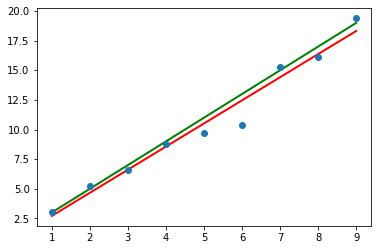

In [14]:
# Question 4
import numpy as np
import matplotlib.pyplot as plt

m = 2 # Line equation : y = m*x + c . m i s the s lope . c i s the int e r c ept .
c = 1
x = np . arange (1 ,10 , 1)
np.random.seed(45)
sigma=1
noice=sigma*np.random.randn(len(x))
#n = 2.*np . random. randn ( len ( x ) )
o = np . zeros ( x . shape )
# o[=1] = 20
y = m*x + c + noice + o

n=len(x)
X=np.concatenate([x.reshape(n,1), np.ones((n,1))], axis = 1)
B= np.linalg.pinv(X.T @ X) @ X.T@y
mstar = B[0]
cstar =B[1]

plt.plot([x[0],x[-1]],[m*x[0]+c, m*x[-1]+c], color='g', linewidth = 2, label=r'True line')
plt.plot([x[0],x[-1]],[mstar*x[0]+cstar, mstar*x[-1]+cstar], color='r', linewidth = 2, label=r'Estimate line')
plt.plot(x,y,'o',label = "Noisey points")


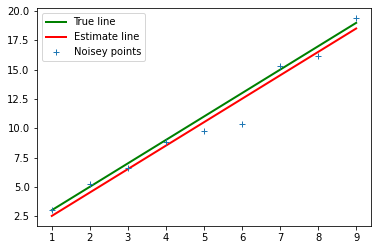

In [16]:
# Question 5
import numpy as np
import matplotlib.pyplot as plt

m = 2 # Line equation : y = m*x + c . m i s the s lope . c i s the int e r c ept .
c = 1
x = np . arange (1 ,10 , 1)
np.random.seed(45)
sigma=1
noice=sigma*np.random.randn(len(x))
#n = 2.*np . random. randn ( len ( x ) )
o = np . zeros ( x . shape )
# o[=1] = 20
y = m*x + c + noice + o

n=len(x)

u11=np.sum((x-np.mean(x))**2)
u12=np.sum((x-np.mean(x))*(y-np.mean(y)))
u21=u12
u22=np.sum((y-np.mean(y))**2)

U=np.array([[u11,u12],[u21,u22]])
W,V=np.linalg.eig(U)

ev_corresponding_to_smalest_ev=V[:,np.argmin(W)]

a=ev_corresponding_to_smalest_ev[0]
b=ev_corresponding_to_smalest_ev[1]
d=a*np.mean(x)+b*np.mean(y)

mstar=-a/b
cstar=d/b

plt.plot([x[0],x[-1]],[m*x[0]+c, m*x[-1]+c], color='g', linewidth = 2, label=r'True line')
plt.plot([x[0],x[-1]],[mstar*x[0]+cstar, mstar*x[-1]+cstar], color='r', linewidth = 2, label=r'Estimate line')
plt.plot(x,y,'+',label = "Noisey points")
plt.legend(loc='best')